In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import L1L2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('./IT_mod.csv')

# Replace null values with 0
df.fillna(0, inplace=True)

# Print the data
print(df)

            Date Symbol Series  Prev Close     Open     High      Low  \
0     2015-01-01  WIPRO     EQ      555.20   552.55   554.40   550.50   
1     2015-01-02  WIPRO     EQ      552.40   553.40   560.25   553.00   
2     2015-01-05  WIPRO     EQ      557.30   557.05   565.00   555.50   
3     2015-01-06  WIPRO     EQ      558.30   555.00   556.40   542.10   
4     2015-01-07  WIPRO     EQ      545.25   543.20   545.00   538.35   
...          ...    ...    ...         ...      ...      ...      ...   
7825  2021-04-26   INFY     EQ     1333.80  1332.25  1351.30  1321.00   
7826  2021-04-27   INFY     EQ     1343.55  1346.00  1353.00  1340.15   
7827  2021-04-28   INFY     EQ     1348.50  1358.00  1359.50  1344.60   
7828  2021-04-29   INFY     EQ     1356.00  1368.00  1369.00  1351.40   
7829  2021-04-30   INFY     EQ     1356.35  1346.30  1373.90  1345.90   

         Last    Close     VWAP   Volume      Turnover  Trades  \
0      552.25   552.40   552.70   202978  1.121859e+13   

In [3]:

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

In [4]:
# Function for calculating the metrics of a model trained on a particular stock in the sector.
def stockMetrics(y_test, predictions):
    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    nrmse = rmse / (np.max(y_test) - np.min(y_test))
    actual_growth = ((y_test[-1][0] - y_test[0][0]) / y_test[0][0]) * 100
    predicted_growth = ((predictions[-1][0] - predictions[0][0]) / predictions[0][0]) * 100
    
    return mse, rmse, mae, nrmse, actual_growth, predicted_growth

In [5]:
# Function for plotting the Actual vs Predicted Growth of each stock in a sector.
def stockActVsPred(stock_df, y_test, predictions):
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], y_test, label='Actual')
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], predictions, label='Predicted')
    plt.title(f'Actual vs Predicted Stock Closing Prices for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Stock Closing Price')
    plt.legend()
    plt.show()

Epoch 1/10
30/30 [==============================] - 7s 62ms/step - loss: 0.0092 - val_loss: 0.0095
Epoch 2/10
30/30 [==============================] - 1s 27ms/step - loss: 0.0020 - val_loss: 0.0054
Epoch 3/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0016 - val_loss: 0.0050
Epoch 4/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0013 - val_loss: 0.0049
Epoch 5/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0013 - val_loss: 0.0051
Epoch 6/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0011 - val_loss: 0.0043
Epoch 7/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 8/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 9/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0012 - val_loss: 0.0041
Epoch 10/10
8/8 [==============================] - 1s 10ms/step
Metrics of HCLTECH:
MSE: 2474.2585424297854, 

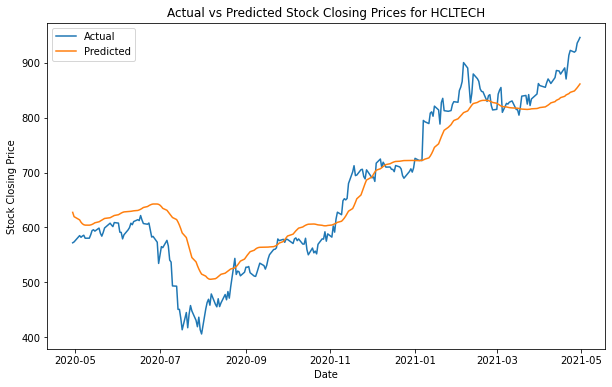

Epoch 1/10
30/30 [==============================] - 6s 66ms/step - loss: 0.0013 - val_loss: 2.2880e-04
Epoch 2/10
30/30 [==============================] - 1s 39ms/step - loss: 2.8289e-04 - val_loss: 2.8434e-04
Epoch 3/10
30/30 [==============================] - 1s 33ms/step - loss: 2.1773e-04 - val_loss: 1.6220e-04
Epoch 4/10
30/30 [==============================] - 1s 32ms/step - loss: 1.8287e-04 - val_loss: 1.6229e-04
Epoch 5/10
30/30 [==============================] - 1s 32ms/step - loss: 1.7713e-04 - val_loss: 1.1920e-04
Epoch 6/10
30/30 [==============================] - 1s 32ms/step - loss: 1.7436e-04 - val_loss: 1.0918e-04
Epoch 7/10
30/30 [==============================] - 1s 31ms/step - loss: 2.0578e-04 - val_loss: 1.1230e-04
Epoch 8/10
30/30 [==============================] - 1s 31ms/step - loss: 1.5174e-04 - val_loss: 1.2451e-04
Epoch 9/10
30/30 [==============================] - 1s 31ms/step - loss: 1.3574e-04 - val_loss: 9.5212e-05
Epoch 10/10
8/8 [========================

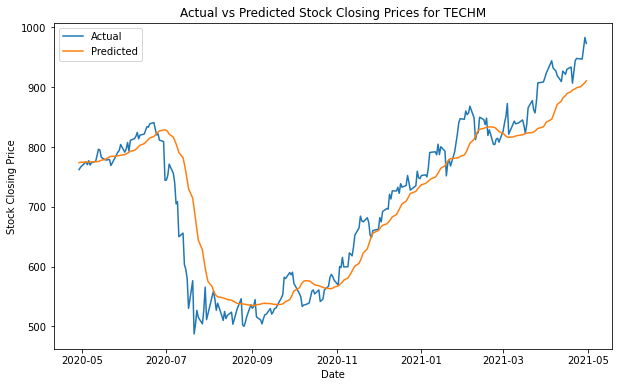

Epoch 1/10
30/30 [==============================] - 6s 61ms/step - loss: 0.0532 - val_loss: 0.0032
Epoch 2/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0096 - val_loss: 0.0039
Epoch 3/10
30/30 [==============================] - 1s 27ms/step - loss: 0.0075 - val_loss: 0.0025
Epoch 4/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0063 - val_loss: 0.0023
Epoch 5/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0063 - val_loss: 0.0018
Epoch 6/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0066 - val_loss: 0.0030
Epoch 7/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 8/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0060 - val_loss: 0.0020
Epoch 9/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0056 - val_loss: 0.0020
Epoch 10/10
8/8 [==============================] - 1s 10ms/step
Metrics of WIPRO:
MSE: 379.2887812512415, RMS

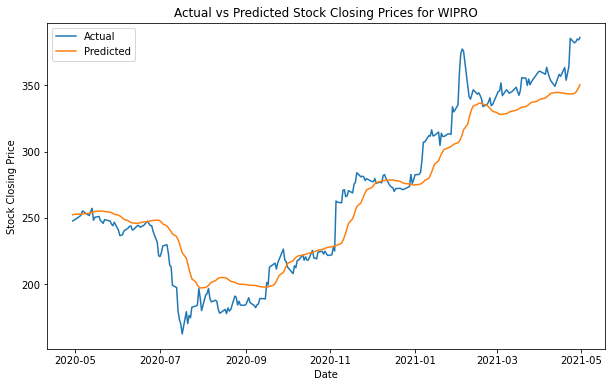

Epoch 1/10
30/30 [==============================] - 6s 59ms/step - loss: 0.0276 - val_loss: 0.0017
Epoch 2/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0123 - val_loss: 0.0015
Epoch 3/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0109 - val_loss: 0.0014
Epoch 4/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0098 - val_loss: 0.0013
Epoch 5/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0080 - val_loss: 0.0013
Epoch 6/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0083 - val_loss: 0.0022
Epoch 7/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0085 - val_loss: 0.0013
Epoch 8/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0069 - val_loss: 0.0015
Epoch 9/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0061 - val_loss: 0.0013
Epoch 10/10
8/8 [==============================] - 1s 11ms/step
Metrics of TCS:
MSE: 7625.33709939143, RMSE: 

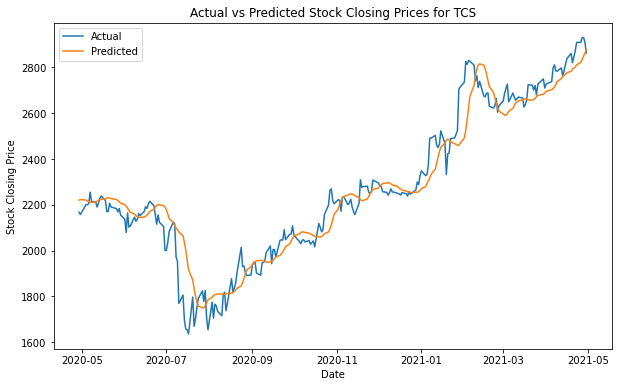

Epoch 1/10
30/30 [==============================] - 6s 62ms/step - loss: 0.0254 - val_loss: 0.0021
Epoch 2/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0059 - val_loss: 0.0011
Epoch 3/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0053 - val_loss: 4.3303e-04
Epoch 4/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0056 - val_loss: 3.4259e-04
Epoch 5/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0041 - val_loss: 3.3661e-04
Epoch 6/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0042 - val_loss: 4.2893e-04
Epoch 7/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0048 - val_loss: 3.5414e-04
Epoch 8/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0044 - val_loss: 3.4145e-04
Epoch 9/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0045 - val_loss: 7.3326e-04
Epoch 10/10
8/8 [==============================] - 1s 11ms/step
Metrics of INFY:


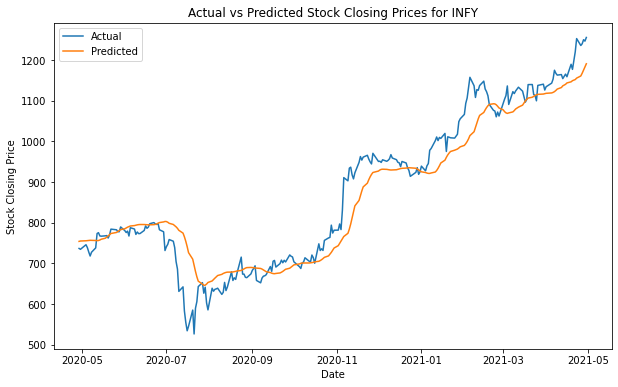

"for symbol, metrics in stock_metrics.items():\n    print(f'Stock: {symbol}, Metrics: {metrics}', sep = '\n')"

In [6]:
# Calculate rolling mean and standard deviation for the 'Close' column
df['50_day_mean'] = df['Close'].rolling(window=50).mean()
df['200_day_mean'] = df['Close'].rolling(window=200).mean()
df['50_day_std'] = df['Close'].rolling(window=50).std()
df['200_day_std'] = df['Close'].rolling(window=200).std()

# Drop rows with NaN values resulting from rolling calculations
df.dropna(inplace=True)

# Define features and target
features = ['Open', 'High', 'Low', 'Close', '50_day_mean', '200_day_mean', '50_day_std', '200_day_std']
target = 'Close'

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Dictionary to store metrics for each stock
stock_metrics = {}

# Process each stock
for symbol in df['Symbol'].unique():
    stock_df = df[df['Symbol'] == symbol].copy()
    
    # Scale features
    scaled_features = scaler.fit_transform(stock_df[features])
    scaled_target = scaler.fit_transform(stock_df[[target]])
    
    X, y = [], []
    dates = []  # List to store the corresponding dates for X and y
    time_steps = 30
    for i in range(time_steps, len(stock_df)):
        X.append(scaled_features[i-time_steps:i])
        y.append(scaled_target[i])
        dates.append(stock_df['Date'].iloc[i])  # Store the corresponding date
        
    X=np.array(X)
    y=np.array(y)
    
    # Convert dates list to a NumPy array for easier indexing
    dates = np.array(dates)
    
    '''# Create sequences
    def create_dataset(X, y, time_steps=1):
        Xs, ys = [], []
        for i in range(len(X) - time_steps):
            Xs.append(X[i:(i + time_steps)])
            ys.append(y[i + time_steps])
        return np.array(Xs), np.array(ys)

    time_steps = 30
    X, y = create_dataset(scaled_features, scaled_target, time_steps)'''
    
    # Split into training and testing datasets based on the specified dates
    '''train_mask = stock_df['Date'] < pd.Timestamp('2020-01-01')
    test_mask = (stock_df['Date'] >= pd.Timestamp('2020-01-01')) & (stock_df['Date'] < pd.Timestamp('2021-01-01'))
    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]'''
    
    # Now create masks based on the adjusted dates array
    train_mask = dates < pd.Timestamp('2020-01-01')
    test_mask = (dates >= pd.Timestamp('2020-01-01')) & (dates < pd.Timestamp('2021-01-01'))
    
    # Use these masks to split the data
    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]
    
    # Build the LSTM model
    model = Sequential([
        LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        Dropout(0.2),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Fit the model
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)
    
    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)
    
    '''# Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    nrmse = rmse / (np.max(y_test) - np.min(y_test))
    actual_growth = ((y_test[-1][0] - y_test[0][0]) / y_test[0][0]) * 100
    predicted_growth = ((predictions[-1][0] - predictions[0][0]) / predictions[0][0]) * 100'''
    
    mse, rmse, mae, nrmse, actual_growth, predicted_growth = stockMetrics(y_test, predictions)
    
    # Store metrics
    stock_metrics[symbol] = {
        'MSE': mse,
        'RMSE': rmse,
        'NRMSE': nrmse,
        'MAE': mae,
        'Actual Growth %': actual_growth,
        'Predicted Growth %': predicted_growth
    }
    
    print(f'Metrics of {symbol}:')
    print(f'MSE: {mse}, RMSE: {rmse}, NRMSE: {nrmse}, MAE: {mae}, Actual Growth: {actual_growth}, Predicted Growth: {predicted_growth}')
    
    stockActVsPred(stock_df, y_test, predictions)

    '''# Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], y_test, label='Actual')
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], predictions, label='Predicted')
    plt.title(f'Actual vs Predicted Stock Closing Prices for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Stock Closing Price')
    plt.legend()
    plt.show()'''

# Output metrics for each stock
'''for symbol, metrics in stock_metrics.items():
    print(f'Stock: {symbol}, Metrics: {metrics}', sep = '\n')'''
